Before we attempt to model sales of carbon credits, it is useful to view the univariate and joint distributions of the data made available to us to see if any insights can be made.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

After we import the data, we should drop all records in which no credits have yet been issued. As we cannot assess their attractiveness to customers.

In [53]:
data=pd.read_csv(("../data/transformed/transform.csv"))
data.drop(data[data['VER_issued_credits']==0].index,inplace=True)
data

,id,created_at,updated_at,name,description,gsf_standards_version,estimated_annual_credits,crediting_period_start_date,crediting_period_end_date,methodology,...,Goal_2,Goal_11,Goal_9,Goal_10,Goal_16,Goal_14,crediting_days,VER_sold_percentage,VER_sold_percentage_per_day,continent_code
7,3653,2022-07-25 14:23:52+00:00,2023-03-15 01:54:01+00:00,GS10789 VPA10: Efficient and Clean Cooking for...,This VPA deploys highly efficient improved cha...,Gold Standard for the Global Goals,311327,2021-03-30,2026-03-30,GS TPDDTEC v3.1,...,0,0,0,0,0,0,1826,0.000000,0.000000,AF
8,3649,2022-07-20 14:54:25+00:00,2023-03-27 18:37:46+00:00,TASC Clean Cooking PoA – VPA 3 (Zambia),The goal of the proposed project is to distrib...,Gold Standard for the Global Goals,96484,2021-09-21,2026-09-20,GS TPDDTEC v3.1,...,0,0,0,0,0,0,1825,0.000000,0.000000,AF
22,3566,2022-06-06 09:32:07+00:00,2023-04-06 11:52:59+00:00,GS11450 - MicroEnergy Credits – Microfinance f...,The small-scale project activity involves mark...,Gold Standard for the Global Goals,0,2019-01-25,2024-01-24,AMS-I.A. Electricity generation by the user,...,0,0,0,0,0,0,1825,0.000000,0.000000,AS
23,3563,2022-06-06 09:31:44+00:00,2023-04-06 11:26:28+00:00,GS11450 - MicroEnergy Credits – Microfinance f...,The small-scale project activity involves mark...,Gold Standard for the Global Goals,0,2018-08-25,2023-08-24,AMS-I.A. Electricity generation by the user,...,0,0,0,0,0,0,1825,0.000000,0.000000,AS
24,3562,2022-06-06 09:31:36+00:00,2023-03-31 07:20:09+00:00,GS11450 - MicroEnergy Credits – Microfinance f...,The small-scale project activity involves mark...,Gold Standard for the Global Goals,0,2018-08-25,2023-08-24,AMS-I.A. Electricity generation by the user,...,0,0,0,0,0,0,1825,0.000000,0.000000,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,9,2019-03-27 13:49:29+00:00,2023-01-27 14:29:55+00:00,Kocaeli Landfill Gas to Electricity Project,The aim of the project includes the collection...,V2.1 SOP,100000,2012-03-01,2019-02-28,ACM0001 Flaring or use of landfill gas,...,0,0,0,0,0,0,2555,88.721233,3.472455,AS
1421,7,2019-03-27 13:49:28+00:00,2022-03-02 02:18:30+00:00,YGF Mangshi Household Biogas Tank Project,The project which supported by Hongkong The Co...,V2.1 SOP,4000,2012-10-13,2022-10-12,GS TPDDTEC v 1.,...,0,0,0,0,0,0,3651,88.278155,2.417917,AS
1422,5,2019-03-27 13:49:27+00:00,2020-05-07 18:27:16+00:00,Highveld Air Quality - Highveld Central Project,Implementation of an alternative ignition meth...,2.2,8000,2012-08-08,2022-04-30,GS Alternative Ignition Coal Fires v1.,...,0,0,0,0,0,0,3552,98.967308,2.786242,AF
1423,3,2019-03-27 13:49:27+00:00,2023-02-10 08:43:10+00:00,Degirmen Weir and Hydroelectric Power Plant,Construction and operation of Deðirmen Weir an...,V2.1 SOP,14931,2015-05-23,2022-05-22,AMS-I.D. Grid connected renewable electricity ...,...,0,0,1,0,0,0,2556,100.000000,3.912363,AS


In [54]:
# from datetime import datetime
# data.loc[pd.to_datetime(data['crediting_period_end_date'])>datetime.today(),'crediting_days']=(datetime.today()-pd.to_datetime(data[pd.to_datetime(data['crediting_period_end_date'])>datetime.today()]['crediting_period_start_date'])).dt.days
# data['VER_sold_percentage_per_day']=data['VER_sold_percentage']/data['crediting_days']

FIXING CREDITING DAYS AND PERCENTAGE SOLD PER DAY ^^

In [55]:
import matplotlib.pyplot as plt

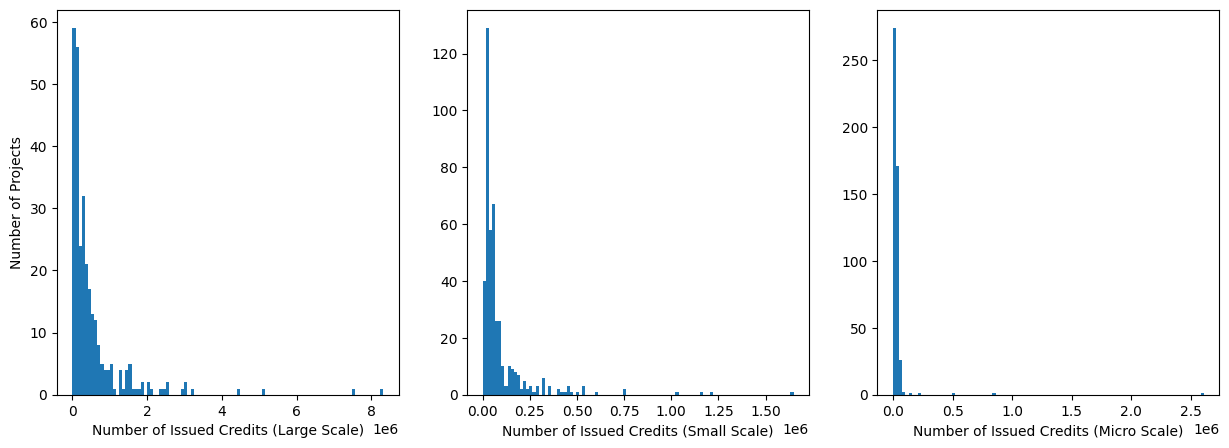

In [56]:
fig,ax =plt.subplots(1,3,figsize=(15,5))
i=0
ax[0].set_ylabel('Number of Projects')
for size in data['size'].unique():
    ax[i].hist(data.loc[data['size']==size,'VER_issued_credits'],bins=100)
    ax[i].set_xlabel(str('Number of Issued Credits ('+size+')'))
    i+=1

Here we can see the number of issued credits for the each project size, naturally we see a reduction in the number of credits issued for smaller scales.

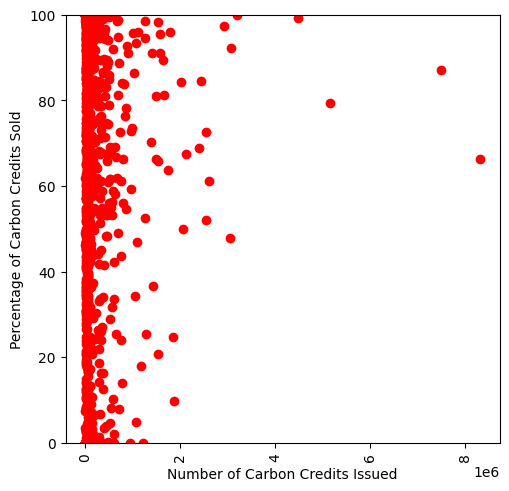

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(data=data,x='VER_issued_credits',y='VER_sold_percentage',color='r')
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.xlabel('Number of Carbon Credits Issued')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.show()

With this full graph we can see little trend in smaller amounts of carbon credits issued and its effect on sales. However the few extremely large projects did seem to have high percentage sold, although there are not enough points to make and claims with large amounts of confidence.

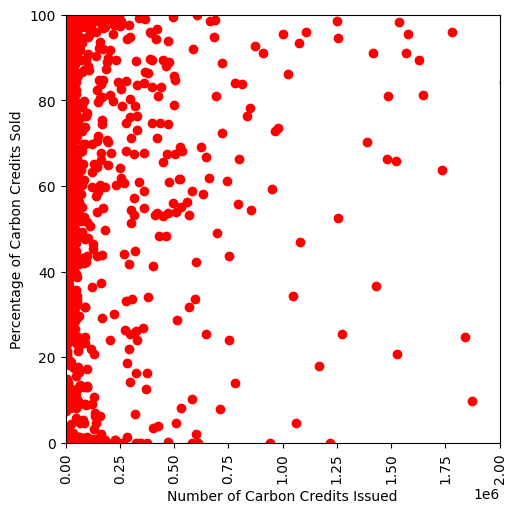

In [58]:
plt.figure(figsize=(5,5))
plt.scatter(data=data,x='VER_issued_credits',y='VER_sold_percentage',color='r')
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.xlim([0,2000000])
plt.xlabel('Number of Carbon Credits Issued')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.show()

This zoomed in graph gives a clearer look at the little effect of number issued on percentage sold.

Text(0, 0.5, 'Number of Projects')

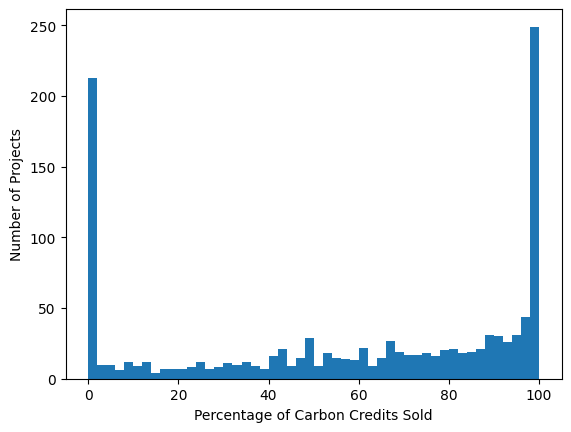

In [59]:
plt.hist(data['VER_sold_percentage'],bins=50)
plt.xlabel('Percentage of Carbon Credits Sold')
plt.ylabel('Number of Projects')

When looking at the distribution of percentage of credits sold, we noice large peaks at 0 and 100. Suggesting a large bulk of projects either have no sales or sell everything. The number of 0 sales could also come from a fault in the data (e.g. sales not being updated) but we cannot find any commonality between entries to indicate this.

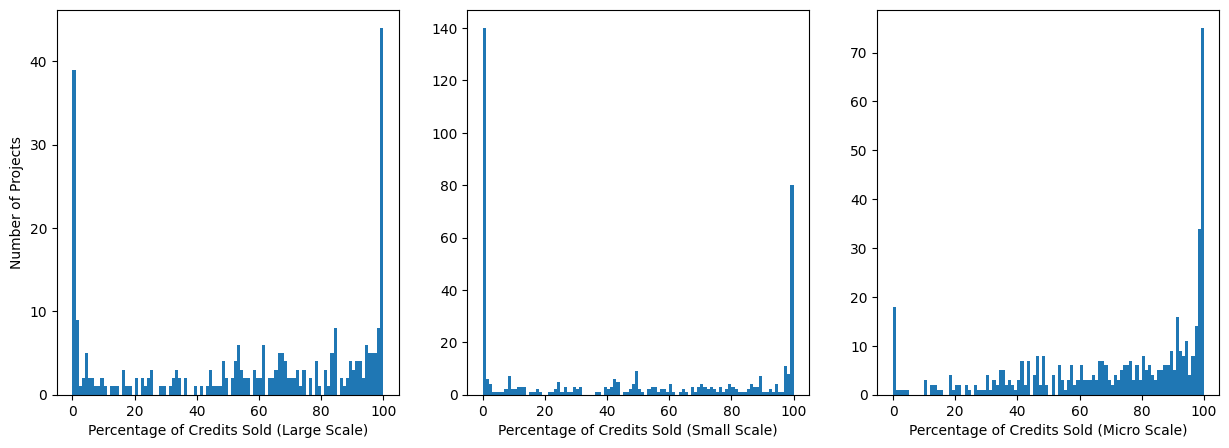

In [60]:
fig,ax =plt.subplots(1,3,figsize=(15,5))
i=0
ax[0].set_ylabel('Number of Projects')
for size in data['size'].unique():
    ax[i].hist(data.loc[data['size']==size,'VER_sold_percentage'],bins=100)
    ax[i].set_xlabel(str('Percentage of Credits Sold ('+size+')'))
    i+=1

The same trends can be seen when splitting by project scale.

(0.0, 0.3)

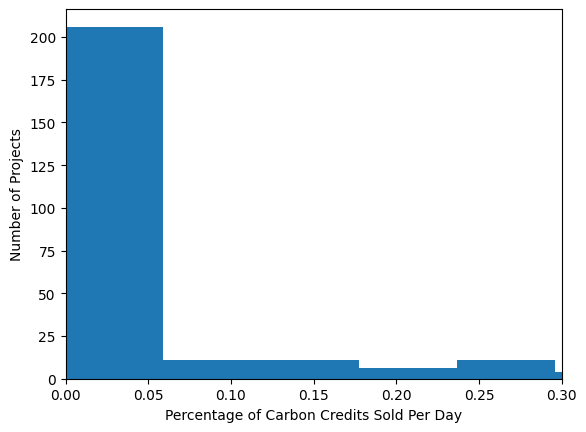

In [61]:
plt.hist(data['VER_sold_percentage_per_day'],bins=1000)
plt.xlabel('Percentage of Carbon Credits Sold Per Day')
plt.ylabel('Number of Projects')
plt.xlim(0,0.3)

As there is such a large number of 100% sales, we may be interested instead to view the average percentage sold per day to indicate attractiveness. As we can see from this graph there is bit more variation. However we have no indication of when each project sold out, so standardising the percentage sold by the whole crediting period would possibly create misleading numbers.
For example, a project may have had a crediting period of 5 years but sold out on the first day. If we were to evaluate the percentage sold per day we would get a number of 0.05% per day which would be far from the truth.

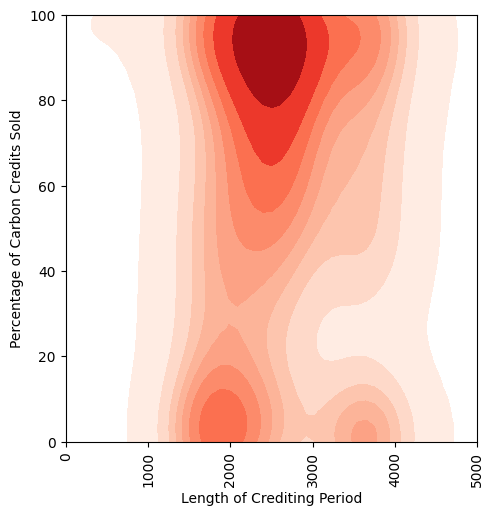

In [62]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=data,x='crediting_days',y='VER_sold_percentage',color='r', fill=True,cmap="Reds")
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.xlim([0,5000])
plt.ylabel('Percentage of Carbon Credits Sold')
plt.xlabel('Length of Crediting Period')
plt.show()

When looking at the joint kernel density plot of crediting period and percentage of credits sold there does appear to be a slight correlation. However most of the contours are orthogonal and their is not a large enough amount of variation to justify using percentage of sold credits per day instead percentage sold.
As a result we are best to use the total percentage of credits sold when predicting.

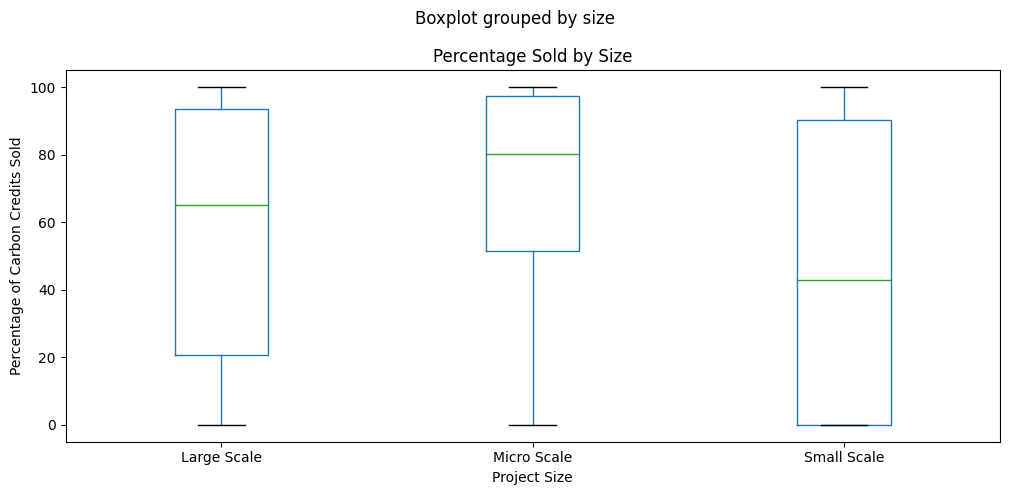

In [63]:
data.boxplot('VER_sold_percentage',by='size',figsize=(10,5),grid=False)
plt.tight_layout()
plt.title('Percentage Sold by Size')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.xlabel('Project Size')
plt.show()

Micro Scale projects had higher and Small Scale projects had lower average percentage sales than Large Scale Projects.

<Figure size 800x400 with 0 Axes>

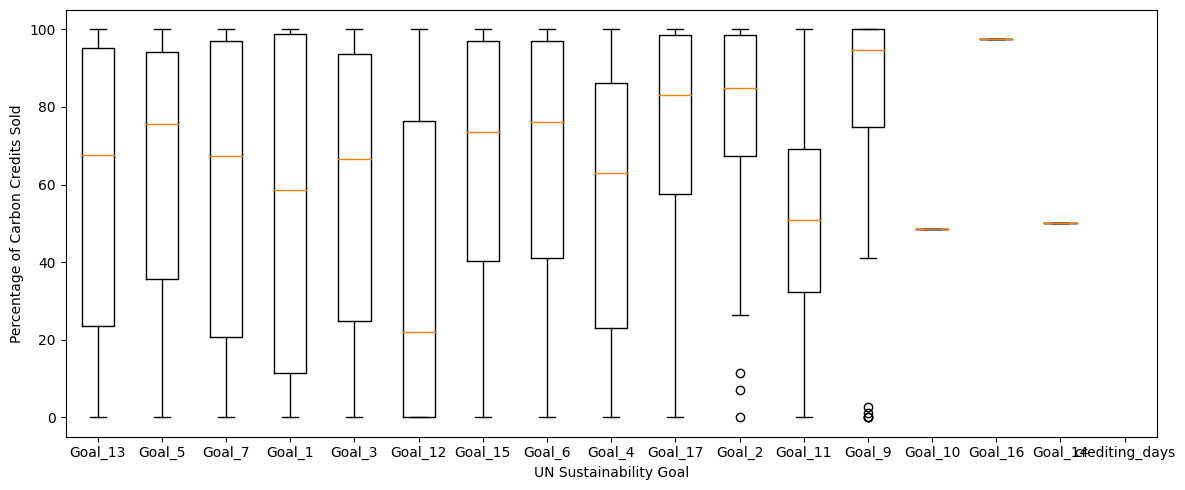

In [64]:
plt.figure(figsize=[8,4])
fig, ax = plt.subplots(figsize=(12,5),layout='tight')
goals_sales={}
for i in range(0,17):
    colname=data.columns[27+i]
    goals_sales[colname]=list(data[data.iloc[:,27+i]==1]['VER_sold_percentage'].dropna())
ax.boxplot(goals_sales.values())
ax.set_xticklabels(goals_sales.keys())
plt.ylabel('Percentage of Carbon Credits Sold')
plt.xlabel('UN Sustainability Goal')
plt.tight_layout()

From plotting the percentage of credits sold across each UN sustainability goal we can notice a couple things. Firstly, there are very few carbon credits that fulfill goals 10, 14 & 16. But secondly, more importantly, there is a destinctive variation between each goals and the percentage of credits sold.
It seems like goals 2, 5, 6, 9, 15 & 17 seem noticeably more popular in terms of sales.

In [65]:
data['num_of_goals']=np.sum(data.iloc[:,27:44],axis=1)

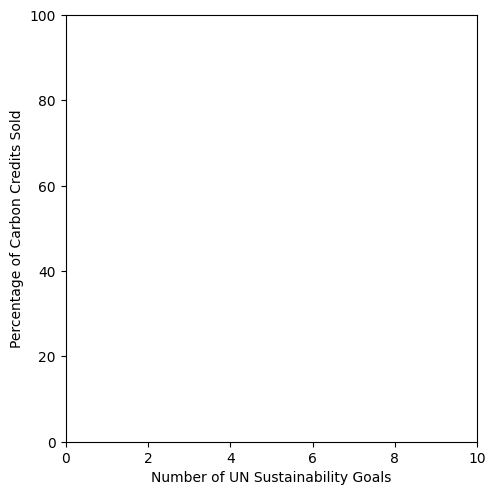

In [66]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=data,x='num_of_goals',y='VER_sold_percentage',color='r', fill=True,cmap="Reds")
plt.tight_layout()
plt.ylim([0,100])
plt.xlim([0,10])
plt.xlabel('Number of UN Sustainability Goals')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.show()

After calculating the number of sustainability goals fulfilled by each carbon credit project, we can plot the joint distribution to see if there is any effect. Since the contours are orthogonal to each other, we can somewhat surprisingly conclude that the number of sustainability goals likely has little effect on the attractiveness of a carbon credit.

In [67]:
### NOT USING THIS FEATURE

# world_data=pd.read_csv("../data/world_country_and_usa_states_latitude_and_longitude_values.csv")
# def find_long(row,world_data=world_data):
#     long=float(world_data.loc[world_data['country_code']==row['country_code'],'longitude'].values)
#     return (long)

# def find_lat(row,world_data=world_data):
#     lat=float(world_data.loc[world_data['country_code']==row['country_code'],'latitude'].values)
#     return (lat)

In [68]:
# data.loc[data['latitude'].isna(),'latitude']=data[data['latitude'].isna()].apply(find_lat,axis=1)
# data.loc[data['longitude'].isna(),'longitude']=data[data['longitude'].isna()].apply(find_long,axis=1)

FILLING LONGITUDE AND LATITUDE^^

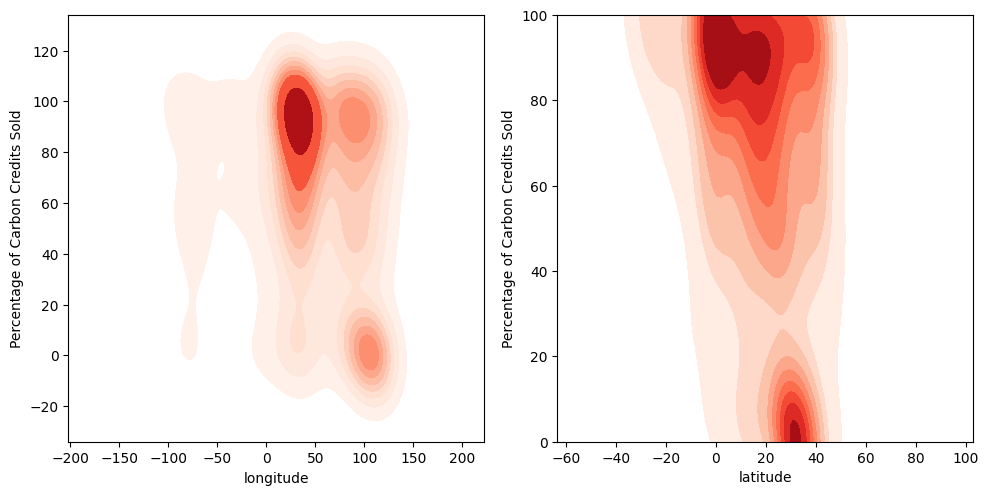

In [69]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(data=data,x='longitude',y='VER_sold_percentage',color='r', fill=True,cmap="Reds",ax=ax[0])
sns.kdeplot(data=data,x='latitude',y='VER_sold_percentage',color='r', fill=True,cmap="Reds",ax=ax[1])
plt.tight_layout()
plt.ylim([0,100])
ax[0].set_ylabel('Percentage of Carbon Credits Sold')
ax[1].set_ylabel('Percentage of Carbon Credits Sold')
plt.show()

Looking at the kernel density estimate plot between longitude, latitude and percentage sold we see considerable variation but no clear trend. In addition, the contours are mostly orthogonal.

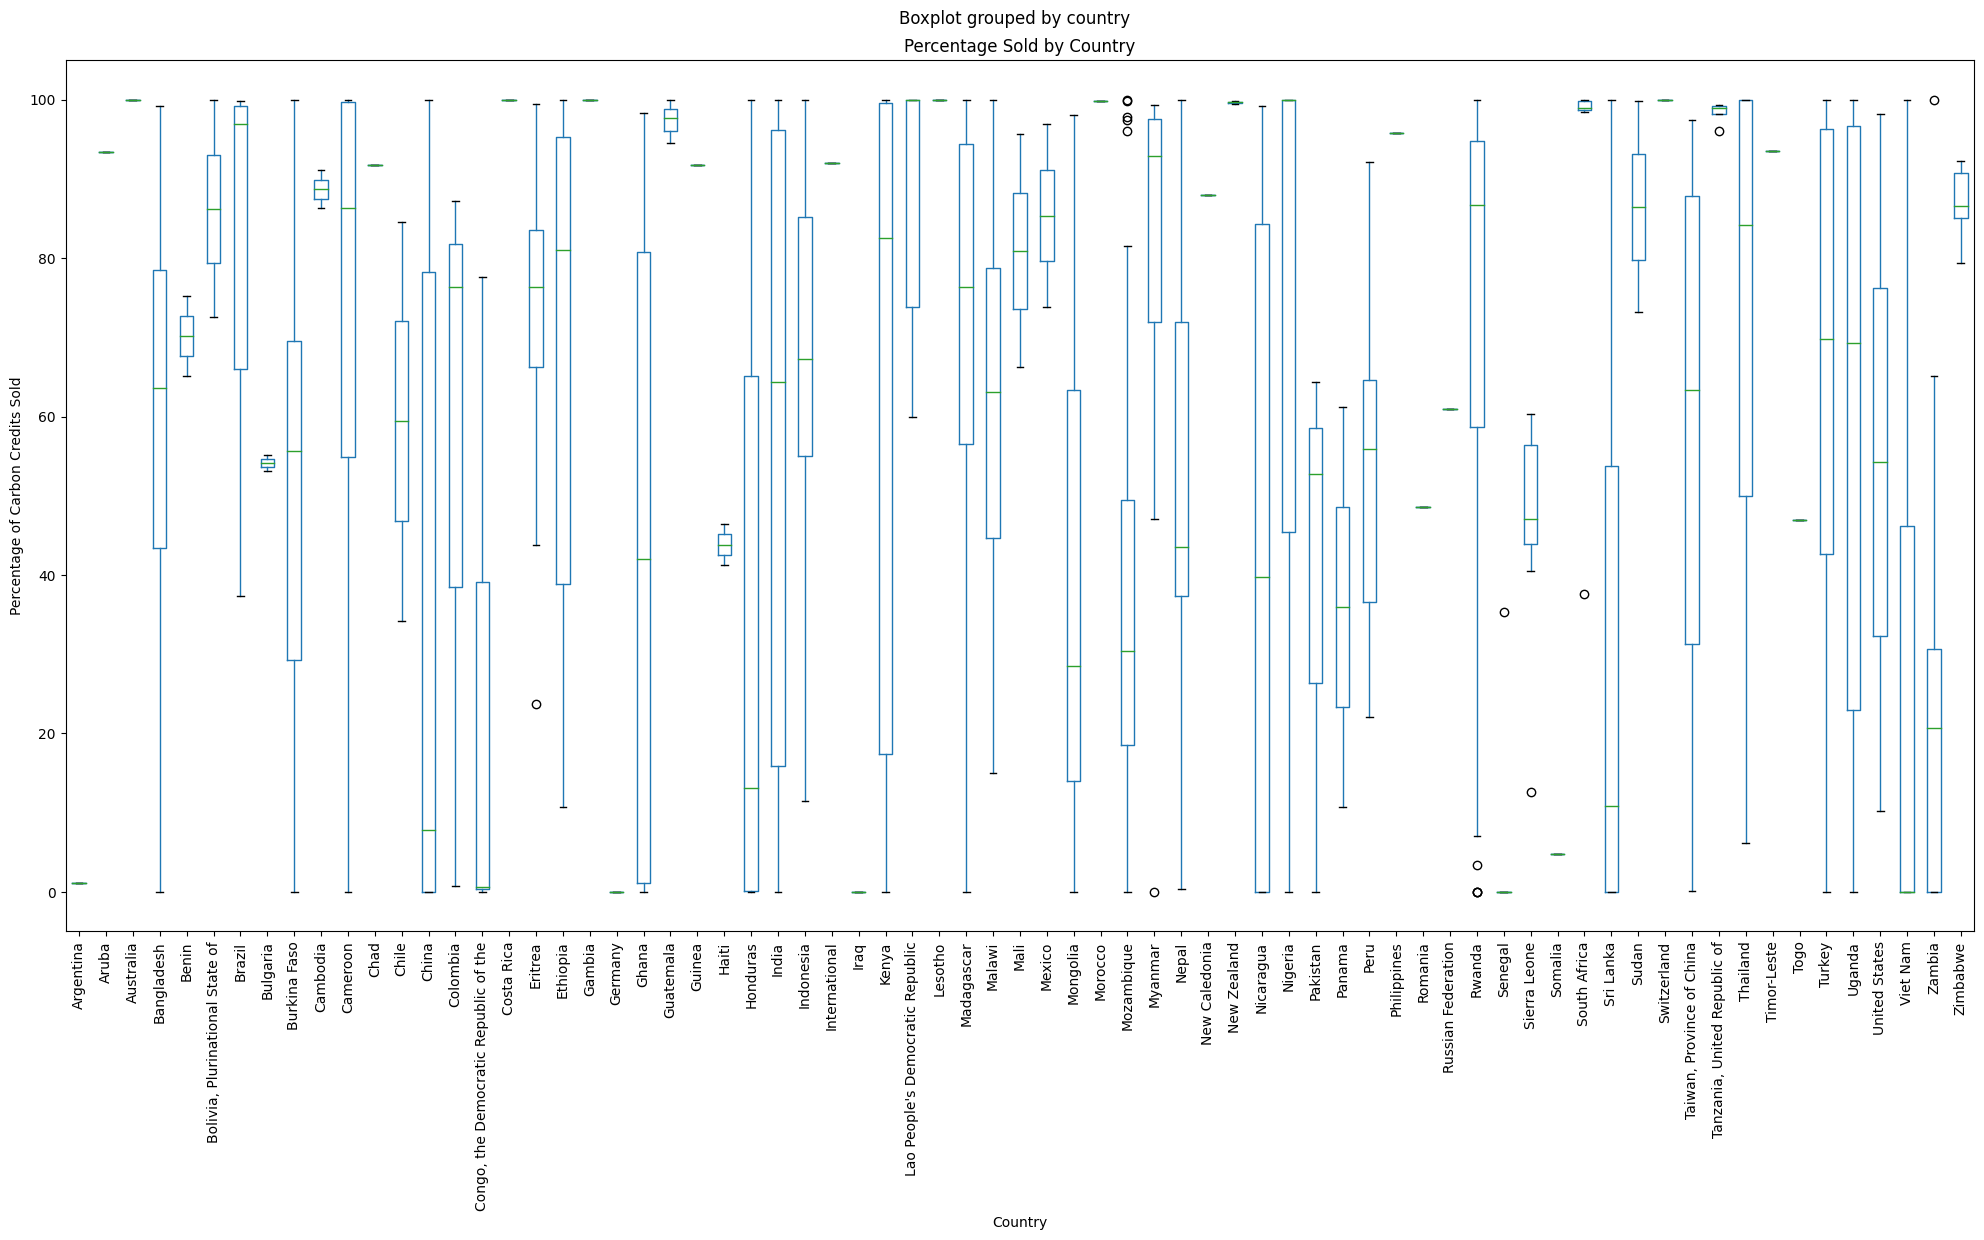

In [70]:
data.boxplot('VER_sold_percentage',by='country',figsize=(20,10),grid=False)
plt.tight_layout()
plt.title('Percentage Sold by Country')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

Gold Standard carbon reduction schemes take place all over the world, with 69 different countries appearing in our data. By plotting the boxplot of each country, we can see large amounts of variation from nation to nation. However with so many countries, and limited data on quite a few it is difficult to explore the largest changes here but we will look more at the correlation of each country during model fitting. In addition, the trend between some countries may be able to be generalised on a continent basis.

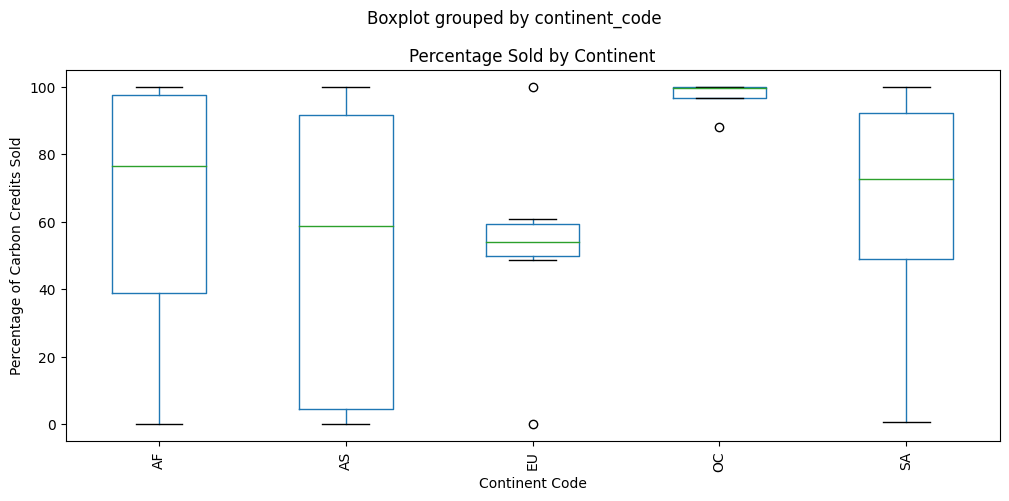

In [71]:
data.boxplot('VER_sold_percentage',by='continent_code',figsize=(10,5),grid=False)
plt.tight_layout()
plt.title('Percentage Sold by Continent')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.xlabel('Continent Code')
plt.xticks(rotation=90)
plt.show()

Plotting by continent, we notice higher sale rates for african and south american projects. This makes sense as these are generally lesser developed regions and customers would likely be more attracted to projects that benefit these areas.
Oceania does also appear to have a very high percentage sold, but since we only have 4 projects from this region in our dataset. We cannot draw any conclusions with much confidence.

In [73]:
def TypeSplit(row,data=data):
    Type=row['type'].split(' - ')
    if Type[0]== 'Small, Low':
        Type[0]=Type[1]
    return(Type[0])

def SectorSplit(row,data=data):
    Type=row['type'].split(' - ')
    if len(Type)<2:
        return row['type']
    if Type[0]== 'Small, Low':
        Type[1]='Electricity'
    return(Type[1])

In [74]:
data['sector']=data.apply(SectorSplit,axis=1)
data['type']=data.apply(TypeSplit,axis=1)

In [81]:
print(data['sector'].unique())
print()
print()
print(data['type'].unique())

['Domestic' 'Wind' 'Other' 'Heat' 'Geothermal' 'Electricity' 'A/R'
 'Cogeneration' 'Industrial' 'Transport Sector' 'Public Sector']


['Energy Efficiency' 'Wind' 'Other' 'Biogas' 'Geothermal' 'A/R'
 'Solar Thermal' 'Impact Hydro' 'Biomass, or Liquid Biofuel']


SPLITTING TYPES^^

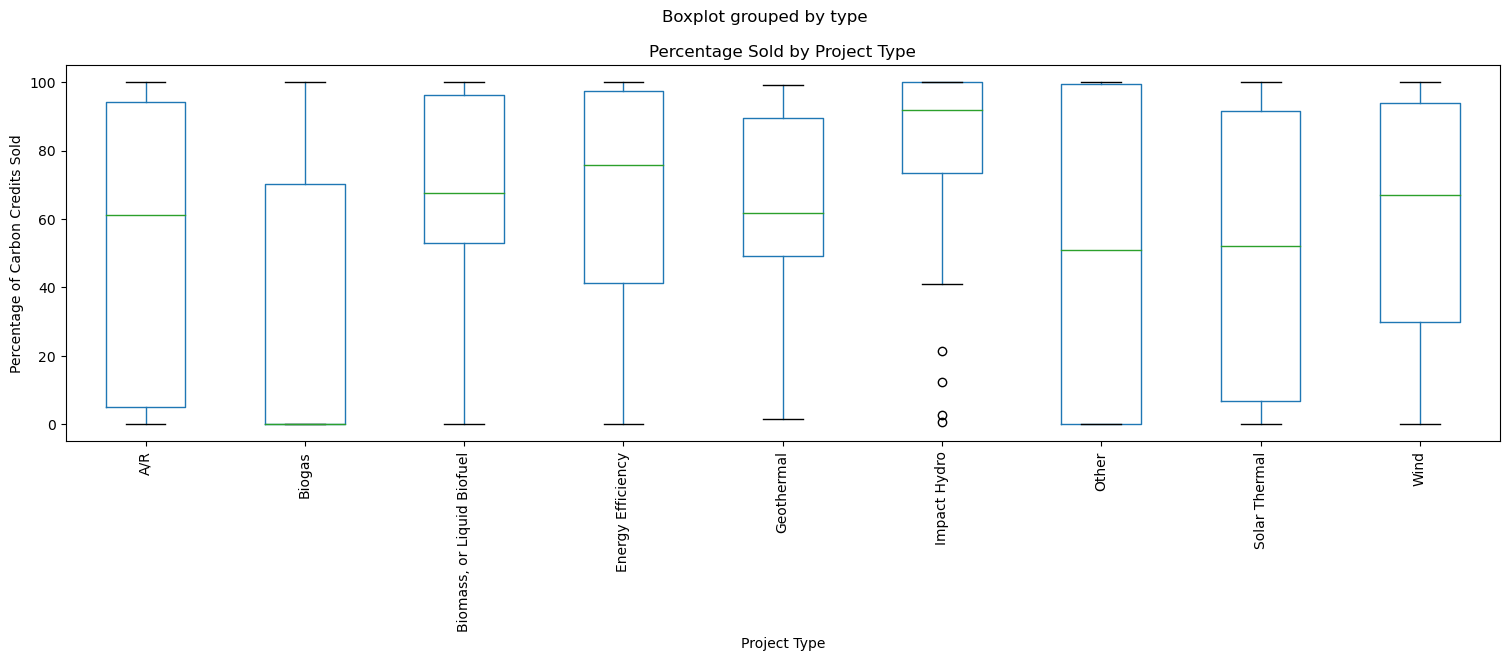

In [ ]:
data.boxplot('VER_sold_percentage',by='type',figsize=(15,5),grid=False)
plt.tight_layout()
plt.xlabel('Project Type')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.title('Percentage Sold by Project Type')
plt.xticks(rotation=90)
plt.show()

Looking at the distribution of different project types, biomass, energy efficiency, geothermal and hydro power seem to be the most attractive projects in terms of sales.

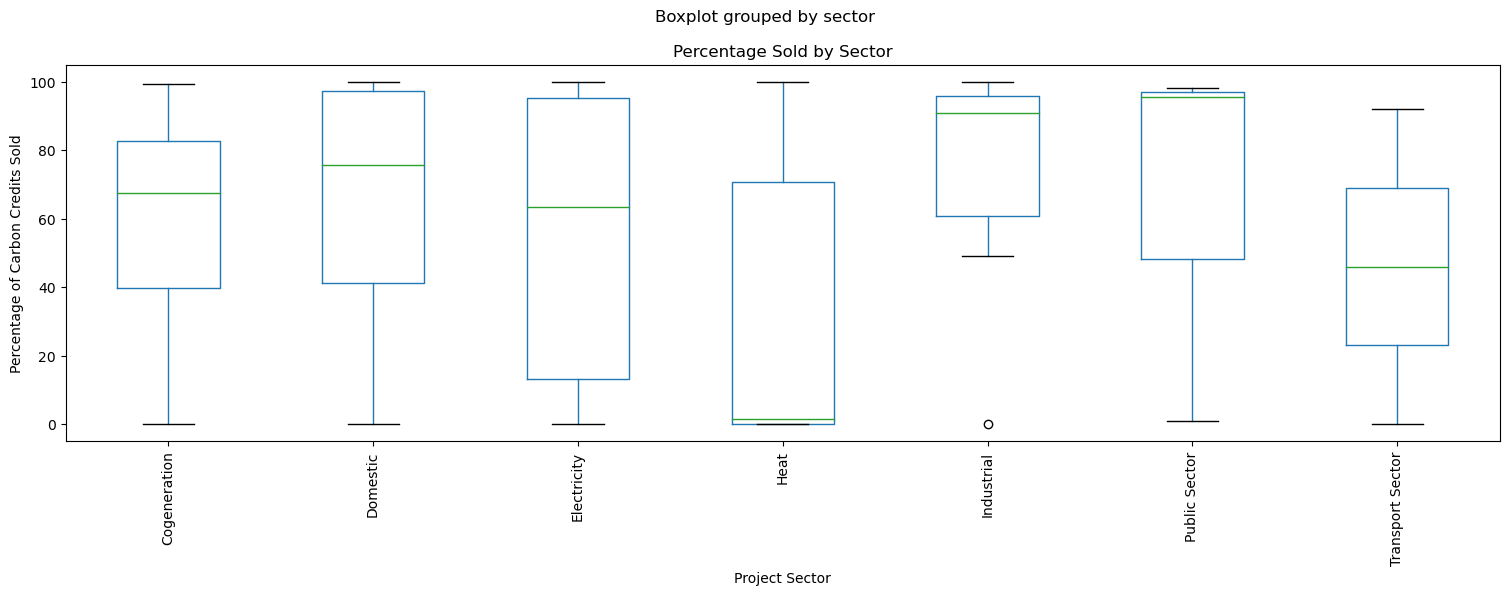

In [ ]:
data.boxplot('VER_sold_percentage',by='sector',figsize=(15,5),grid=False)
plt.tight_layout()
plt.xlabel('Project Sector')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.title('Percentage Sold by Sector')
plt.xticks(rotation=90)
plt.show()

From looking at the distribution of different sectors here, we also see that domestic, industrial and public sector projects sell better than their peers. With heat projects having the lowest attractiveness.

In [ ]:
import sklearn.preprocessing as preprocessing

CountryEncoder=preprocessing.OneHotEncoder(sparse_output=False)
CountryEncoder.fit(data[['country_code']])
data[CountryEncoder.get_feature_names_out()]=CountryEncoder.transform(data[['country_code']])
ContinentEncoder=preprocessing.OneHotEncoder(sparse_output=False)
ContinentEncoder.fit(data[['continent_code']])
data[ContinentEncoder.get_feature_names_out()]=ContinentEncoder.transform(data[['continent_code']])
SizeEncoder=preprocessing.OneHotEncoder(sparse_output=False)
SizeEncoder.fit(data[['size']])
data[SizeEncoder.get_feature_names_out()]=SizeEncoder.transform(data[['size']])
SectorEncoder=preprocessing.OneHotEncoder(sparse_output=False)
SectorEncoder.fit(data[['sector']])
data[SectorEncoder.get_feature_names_out()]=SectorEncoder.transform(data[['sector']])
TypeEncoder=preprocessing.OneHotEncoder(sparse_output=False)
TypeEncoder.fit(data[['type']])
data[TypeEncoder.get_feature_names_out()]=TypeEncoder.transform(data[['type']])

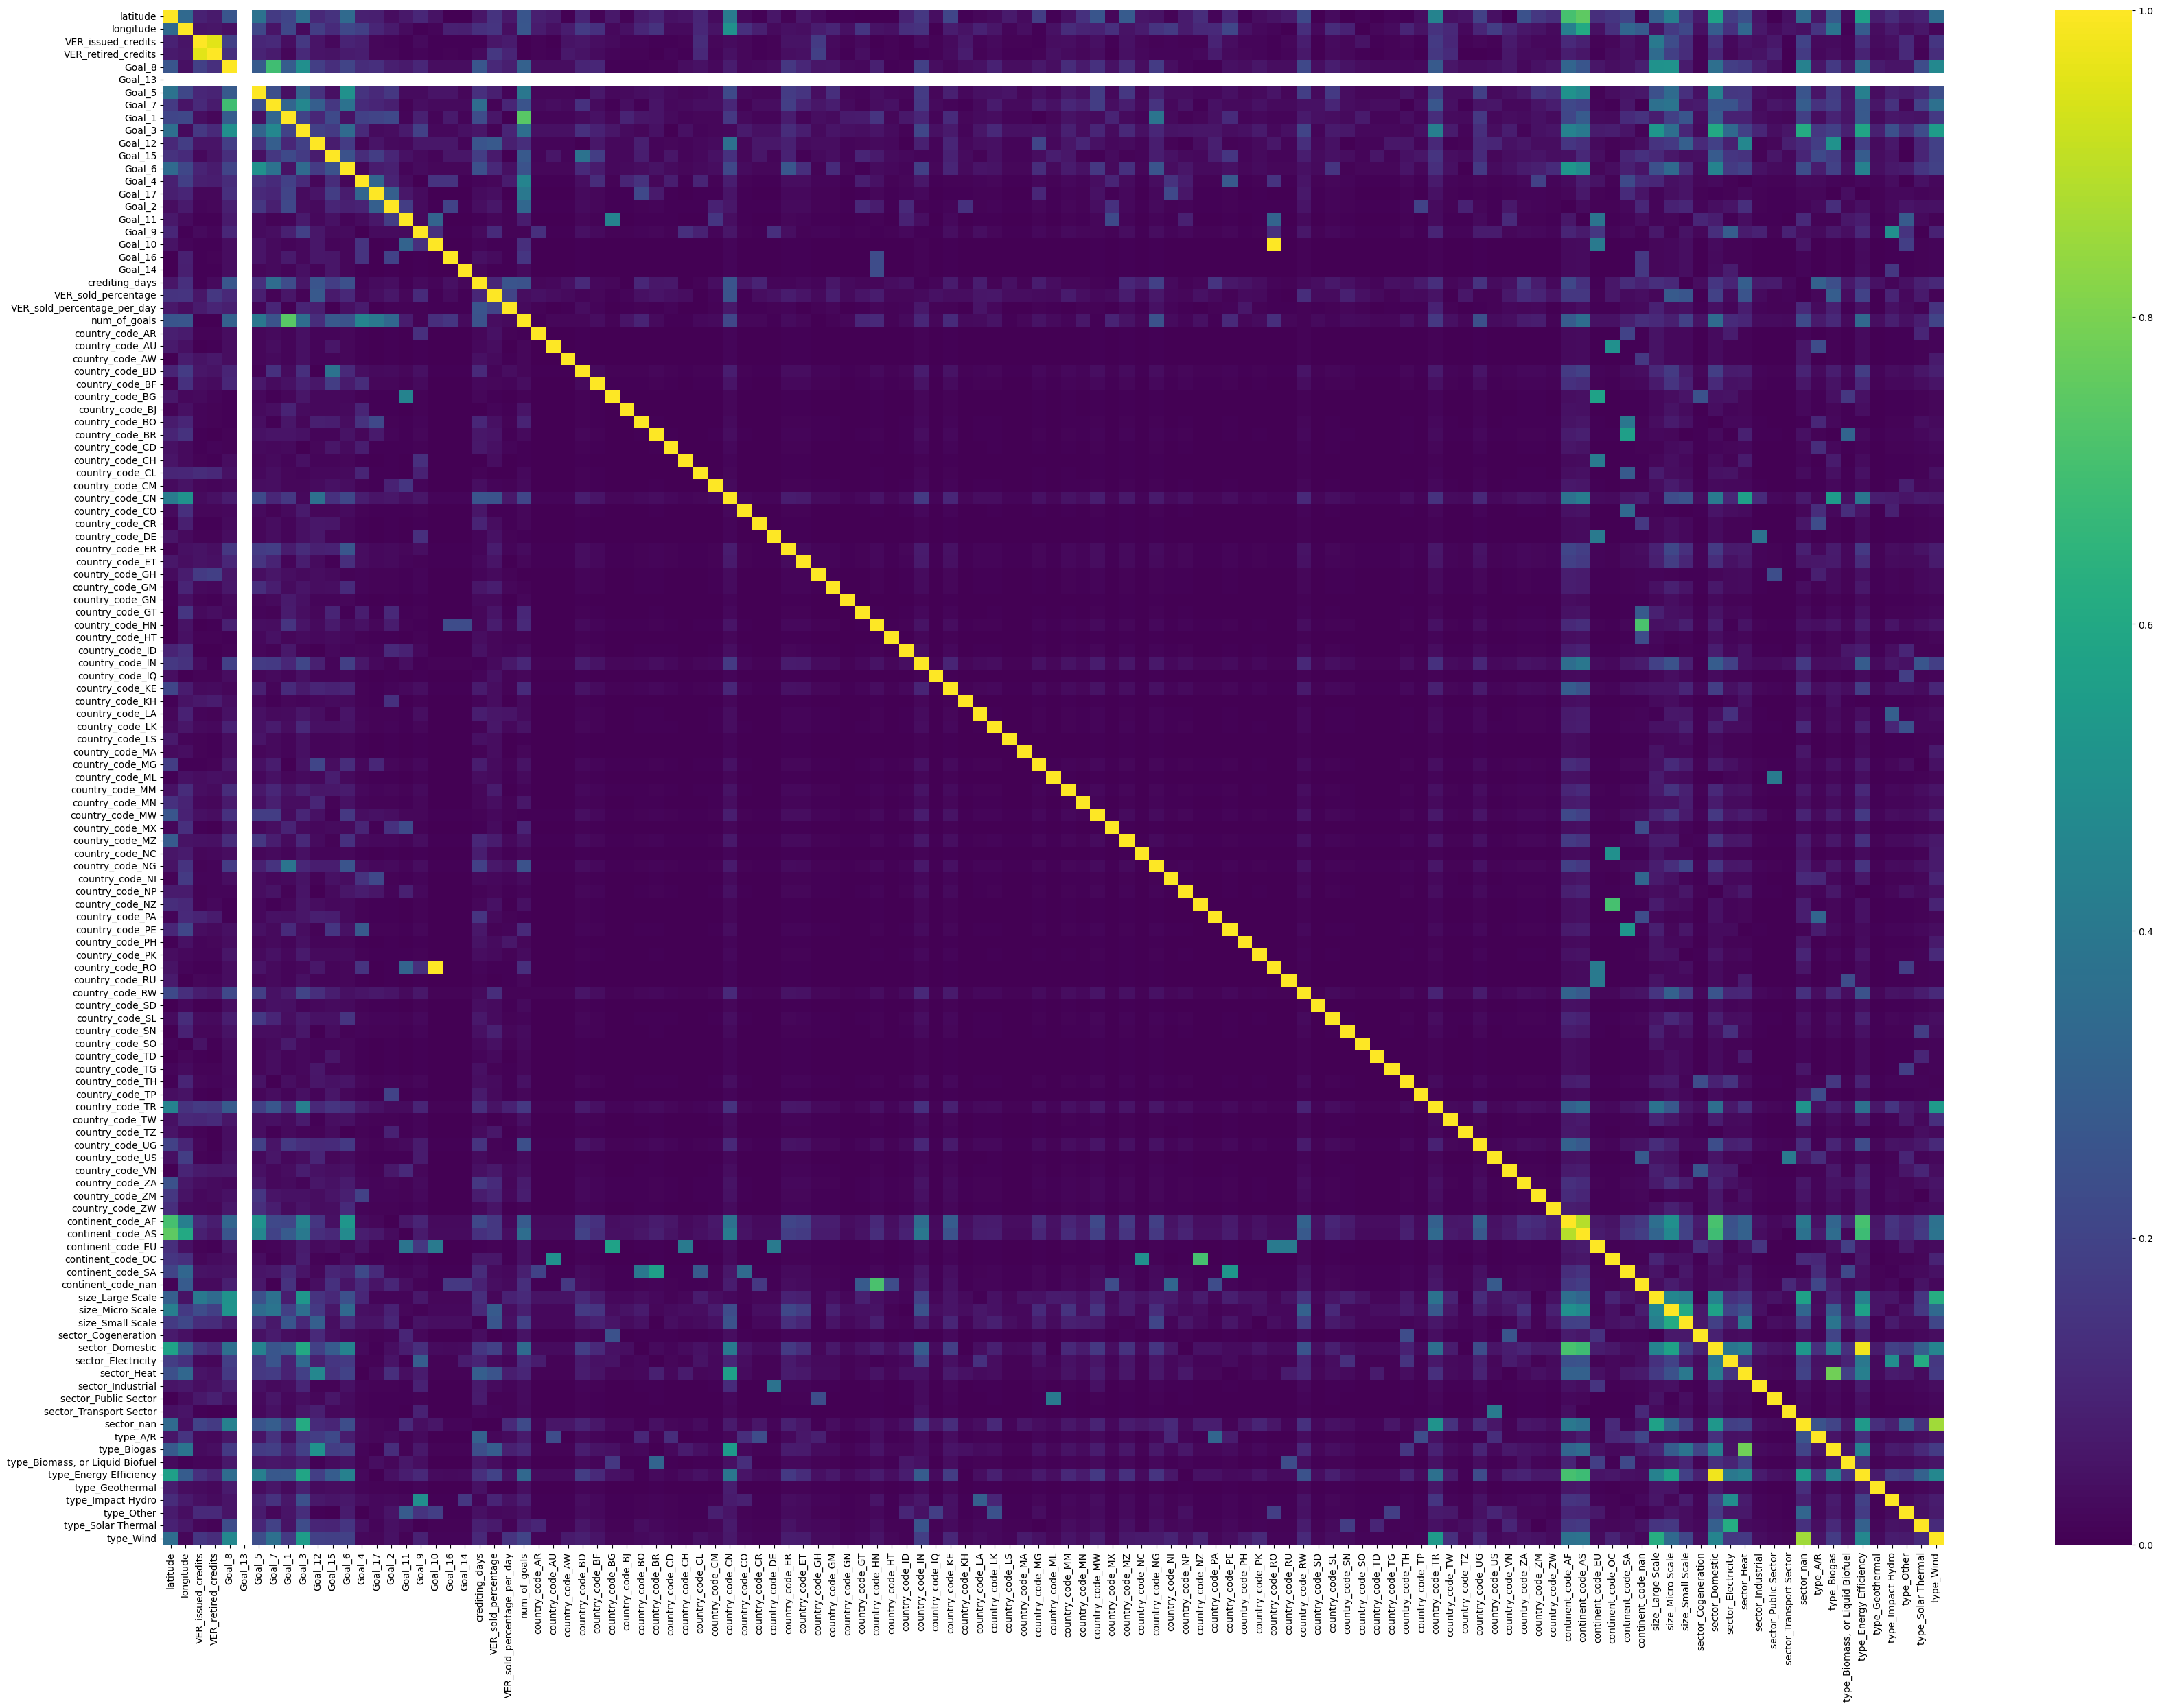

In [ ]:
plt.figure(figsize=(35,25))
sns.heatmap(data.drop(['id','estimated_annual_credits','sustaincert_id','poa_project_id','poa_project_sustaincert_id'],axis=1).corr(numeric_only=True).abs(),cmap='viridis')
plt.tight_layout()

Finally, before fitting we want to check correlations betweens variables, as including two variables that are too largely correlated can lead to very poor model fit. Luckily, as demonstrated above, most variables are not largely correlated with one another. Those that are arise from cases of obvious correlation between country and continent. There also some high correlations between project types and project sector, which makes sense as they were generally paired in our data.
Maybe the most interesting correlation is that between Asia and Africa. This is likely due to a majority of projects being from one of these two countries, as such not being in one heavily suggests the project being in the other.
We also notice that goal 13 is a bit unusual, this is because this is the sustainabilty goal for "climate action" which every carbon credit in our data is achieving. As such we cannot estimate the effect of changing this variable. The are a number of other missing values of correlation, which correspond to a number of countries which have no estimates of longitude and latitude. Which is likely due to some common factor in the law in these countries or commonalities in the projects done there.
These missing values and higher correlations must be addressed before fitting, but it is more useful to get an idea of what variables we will want to use before making any changes.